### Business Problem

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Business Objective

Identify the patterns:

Client with payment difficulties.

All other cases. When payment is paid on time. Identify the clients capable of repaying the loan.

The company wants to understand the driving factors/variables behind loan difficulties i.e. variables which are strong indicators of default.

Clients capable of repaying the loan but applications are rejected.


### Data Types

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.

### Import the libraries

In [147]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
application = pd.read_csv('application_data.csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Session-1 Data Cleaning

There are in total 122 columns in the dataset.We will extract the most important variables and create new dataset.

In [150]:
app_data = application[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]

Checkfor for data types of all the columns

In [151]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   NAME_INCOME_TYPE     307511 non-null  object 
 10  NAME_EDUCATION_TYPE  307511 non-null  object 
 11  NAME_FAMILY_STATUS   307511 non-null  object 
 12  DAYS_BIRTH           307511 non-null  int64  
 13  DAYS_EMPLOYED        307511 non-null  int64  
 14  OCCUPATION_TYPE      211120 non-null  object 
 15  CNT_FAM_MEMBERS  

Segment-1: Check for missing values

In [152]:
app_data.isna().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        96391
CNT_FAM_MEMBERS            2
dtype: int64

In [153]:
app_data.OCCUPATION_TYPE.isna().sum()

96391

In [154]:
96391/app_data.shape[0]*100      # over 31% are missing values

31.345545362604916

Impute missing values in OCCUPATION_TYPE as 'Not mentioned'

In [155]:
app_data.OCCUPATION_TYPE.fillna('Not mentioned', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9436\1368376510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data.OCCUPATION_TYPE.fillna('Not mentioned', inplace=True)


In [156]:
app_data.OCCUPATION_TYPE.value_counts()

Not mentioned            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Handling family members missing values

In [157]:
app_data.CNT_FAM_MEMBERS.isna().sum()

2

In [158]:
app_data = app_data[~app_data.CNT_FAM_MEMBERS.isna()]

In [159]:
app_data.CODE_GENDER.value_counts()

F      202447
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [160]:
Gender_Mode = app_data.CODE_GENDER.mode()[0]
Gender_Mode

'F'

In [161]:
# These missing values are very less around 0.0013 %. 
# we can either delete these rows or impute with mode as it is lesser in number 4 and should not impact the results.
app_data.CODE_GENDER.replace('XNA', Gender_Mode,inplace=True)

Segement-3: Standardizing values

In [162]:
# Clients age in days at the time of application
app_data.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [163]:
# convert days birth in years
app_data['YEARS_BIRTH'] = abs(app_data.DAYS_BIRTH)//356  # Feature Engineering

In [164]:
# We use YEARS_BIRTH for analysis, hence drop the column DAYS_BIRTH
app_data.drop('DAYS_BIRTH', axis=1, inplace=True)

In [165]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,-637,Laborers,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,-1188,Core staff,2.0,47
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,-225,Laborers,1.0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,-3038,Core staff,1.0,55


In [166]:
app_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [167]:
app_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [168]:
# Convert the values Y and N to 1 and 0
app_data.FLAG_OWN_CAR = np.where(app_data.FLAG_OWN_CAR == 'Y', 1, 0)

In [169]:
# Convert the values Y and N to 1 and 0
app_data.FLAG_OWN_REALTY = np.where(app_data.FLAG_OWN_REALTY == 'Y', 1, 0)

### Session- 2 Univariate Analysis

TARGET

In [170]:
app_data.TARGET.value_counts()

0    282684
1     24825
Name: TARGET, dtype: int64

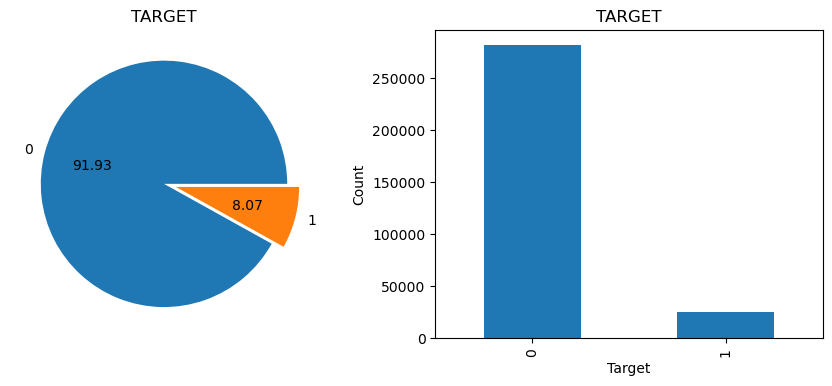

In [171]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
plt.pie(app_data.TARGET.value_counts(),labels = [0, 1],explode=[0,0.1], autopct = "%.2f")
plt.title('TARGET')

plt.subplot(1,2,2)
app_data.TARGET.value_counts().plot.bar()
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('TARGET')
plt.show()

CODE_GENDER

In [172]:
app_data.CODE_GENDER.value_counts()

F    202451
M    105058
Name: CODE_GENDER, dtype: int64

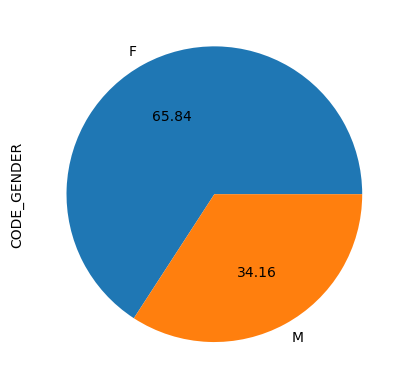

In [173]:
app_data.CODE_GENDER.value_counts().plot.pie(autopct = "%.2f")
plt.show()

AMT_INCOME_TOTAL

In [174]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9436\1424562532.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_data[app_data.AMT_INCOME_TOTAL <= 1000000].AMT_INCOME_TOTAL);


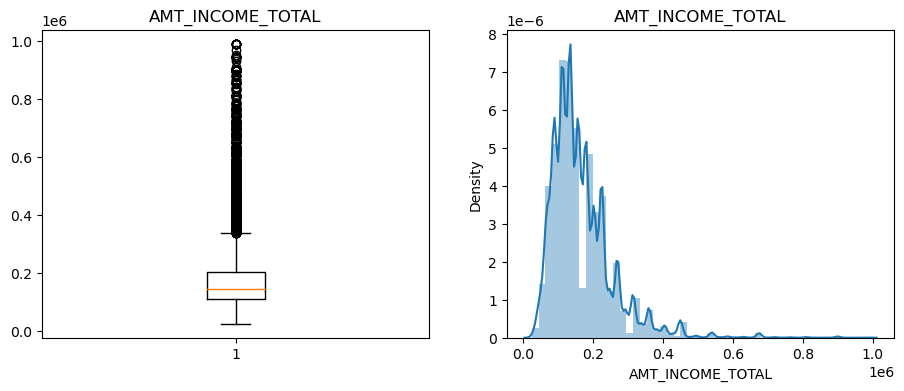

In [175]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
plt.boxplot(app_data[app_data.AMT_INCOME_TOTAL <= 1000000].AMT_INCOME_TOTAL);
plt.title('AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
sns.distplot(app_data[app_data.AMT_INCOME_TOTAL <= 1000000].AMT_INCOME_TOTAL);
plt.title('AMT_INCOME_TOTAL')
plt.show()



NAME_INCOME_TYPE  and  NAME_EDUCATION_TYPE

In [176]:
app_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

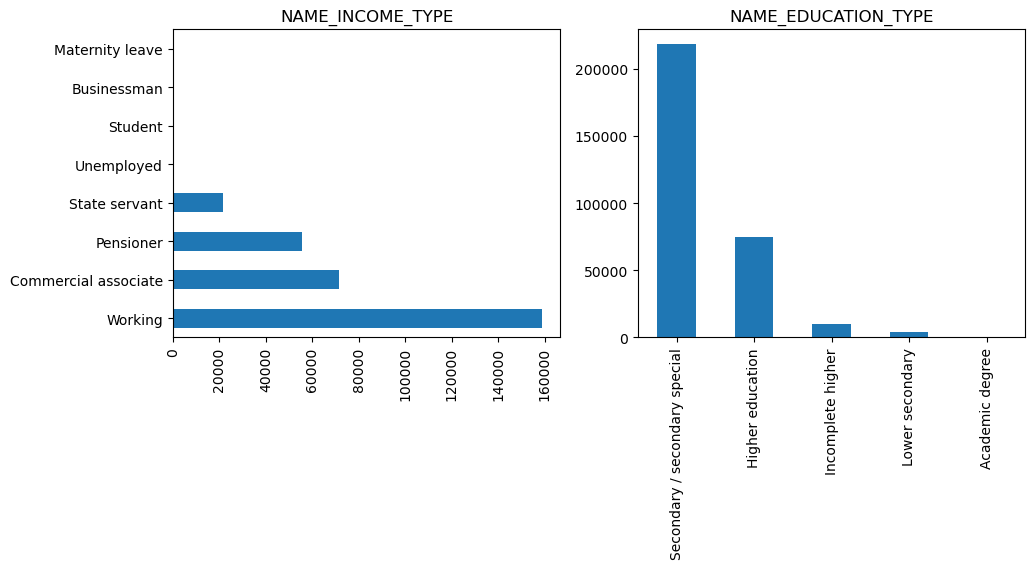

In [177]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
app_data.NAME_INCOME_TYPE.value_counts().plot.barh();
plt.xticks(rotation=90)
plt.title('NAME_INCOME_TYPE')

plt.subplot(1,2,2)
app_data.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title('NAME_EDUCATION_TYPE')
plt.show()

YEARS_BIRTH

In [178]:
app_data.YEARS_BIRTH.describe()

count    307509.000000
mean         44.549054
std          12.263424
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64

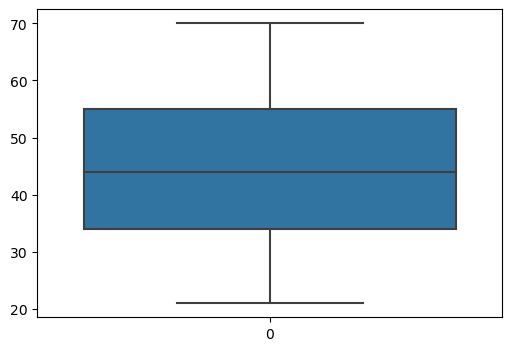

In [179]:
plt.figure(figsize=(6,4))
sns.boxplot(app_data.YEARS_BIRTH)
plt.show()

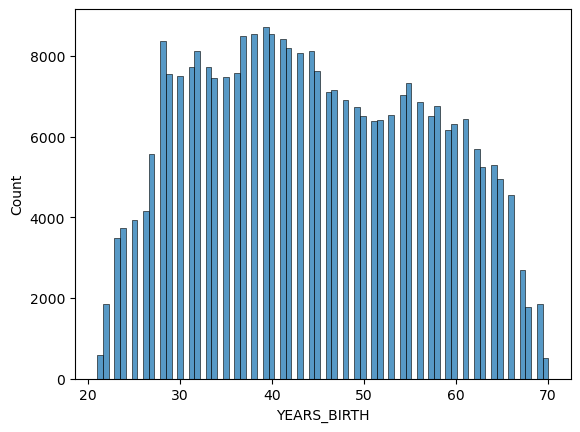

In [180]:
sns.histplot(app_data.YEARS_BIRTH)
plt.show()

### Session-3 Bivariate analysis

NAME_INCOME_TYPE vs TARGET

In [181]:
app_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean() * 100

NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484466
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

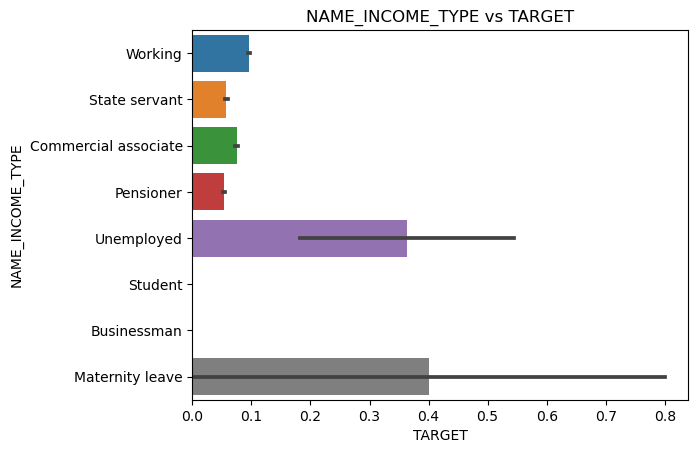

In [182]:
sns.barplot(data = app_data, x = 'TARGET', y = 'NAME_INCOME_TYPE')
plt.title('NAME_INCOME_TYPE vs TARGET')
plt.show()

NAME_FAMILY_STATUS vs TARGET  and NAME_EDUCATION_TYPE vs TARGET

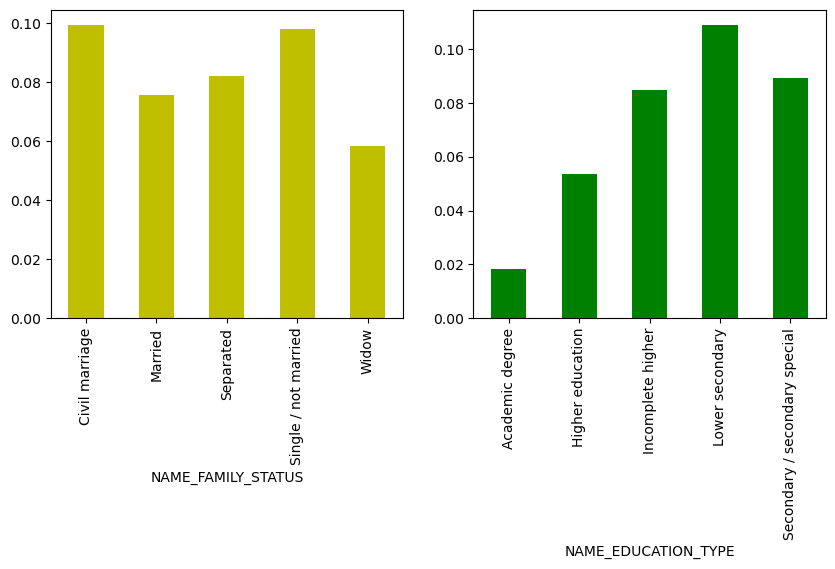

In [183]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.bar(color = 'y', stacked=True)
plt.subplot(1, 2, 2)
app_data.groupby('NAME_EDUCATION_TYPE').TARGET.mean().plot.bar(color = 'g')
plt.show()

In [184]:
# app_data[["AMT_INCOME_TOTAL","AMT_CREDIT", "TARGET"]].corr()

NAME_CONTRACT_TYPE  vs  YEARS_BIRTH and FLAG_OWN_CAR  vs AMT_INCOME_TOTAL

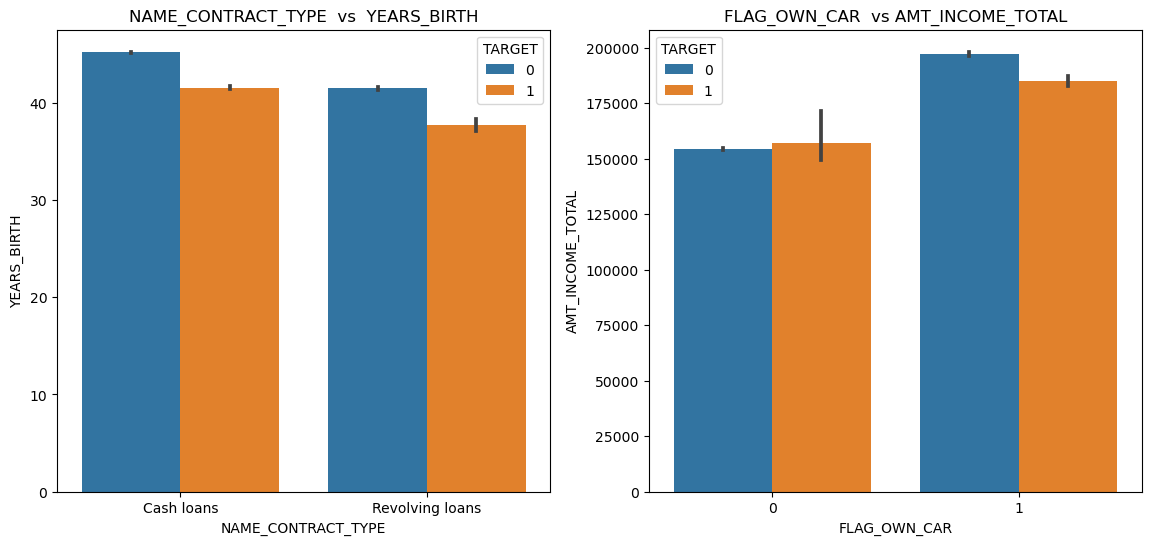

In [185]:
plt.figure(figsize=[14,6])
plt.subplot(1, 2, 1)
sns.barplot(x = app_data.NAME_CONTRACT_TYPE , y = app_data.YEARS_BIRTH, hue=app_data.TARGET)
plt.title('NAME_CONTRACT_TYPE  vs  YEARS_BIRTH')
plt.subplot(1, 2, 2)
sns.barplot(x = app_data.FLAG_OWN_CAR , y = app_data.AMT_INCOME_TOTAL, hue=app_data.TARGET)
plt.title('FLAG_OWN_CAR  vs AMT_INCOME_TOTAL')
plt.show()

### Session-4 Multivariate Analysis

AMT_INCOME_TOTAL vs FLAG_OWN_CAR vs FLAG_OWN_REALTY vs AMT_CREDIT

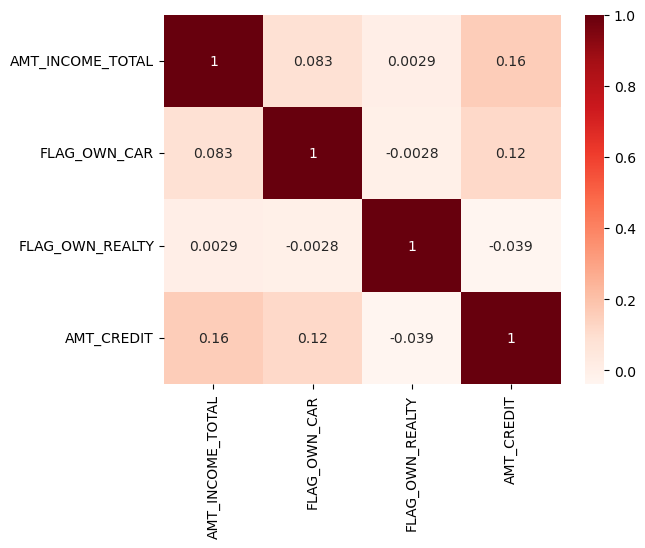

In [186]:
sns.heatmap( app_data[["AMT_INCOME_TOTAL","FLAG_OWN_CAR", "FLAG_OWN_REALTY",'AMT_CREDIT']].corr(), annot= True, cmap= "Reds")
plt.show()

NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET

In [187]:
df1=pd.pivot_table(data=app_data, index="NAME_EDUCATION_TYPE", columns="NAME_FAMILY_STATUS", values="TARGET")
df1

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_EDUCATION_TYPE,,,,,
Academic degree,0.000000,0.018868,0.000000,0.034483,0.000000
Higher education,0.066196,0.049646,0.057346,0.062049,0.048094
Incomplete higher,0.092481,0.079144,0.086643,0.094143,0.063584
Lower secondary,0.135922,0.102961,0.138249,0.132988,0.067961
Secondary / secondary special,0.108322,0.084136,0.089904,0.113243,0.059666


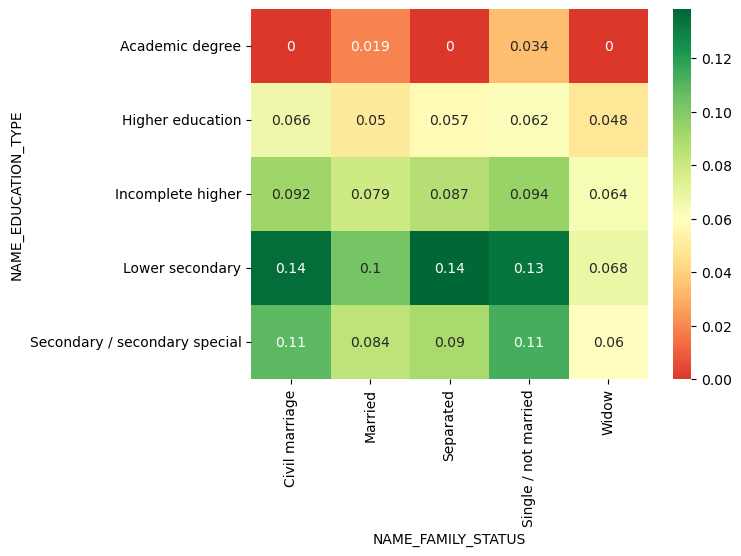

In [188]:
#create the heat map of NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET.
# lower secondary and civil marriage, lower sceondary and separate tends to be more defaulters
sns.heatmap(df1, annot= True, cmap="RdYlGn", center= 0.06)
plt.show()

NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs TARGET

In [189]:
df2=pd.pivot_table(data=app_data, index="NAME_INCOME_TYPE", columns="NAME_FAMILY_STATUS", values="TARGET")
df2

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_INCOME_TYPE,,,,,
Businessman,0.000000,0.000000,NaN,0.000000,NaN
Commercial associate,0.088376,0.069204,0.073397,0.090463,0.055046
Maternity leave,NaN,0.400000,NaN,NaN,NaN
Pensioner,0.063461,0.050906,0.060461,0.055029,0.057042
State servant,0.076131,0.054129,0.054372,0.067864,0.050143
Student,0.000000,0.000000,0.000000,0.000000,NaN
Unemployed,0.000000,0.600000,0.000000,0.200000,0.333333
Working,0.114732,0.089274,0.097534,0.116235,0.063115


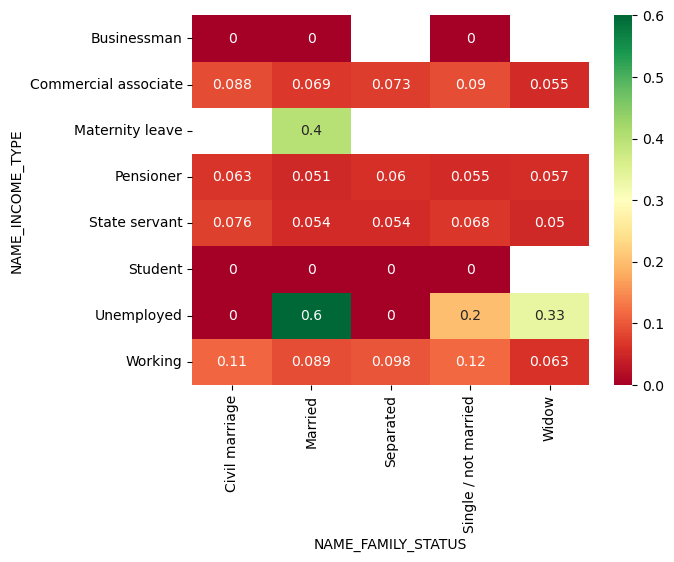

In [190]:
# married and unemployed tends to be more defaulters
sns.heatmap(df2, annot= True, cmap="RdYlGn", center= 0.3)
plt.show()

CODE_GENDER vs NAME_FAMILY_STATUS vs TARGET

In [191]:
df3=pd.pivot_table(data=app_data, index="CODE_GENDER", columns="NAME_FAMILY_STATUS", values="TARGET")
df3

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
CODE_GENDER,,,,,
F,0.084401,0.067980,0.067589,0.077666,0.054517
M,0.134148,0.088208,0.133442,0.132681,0.121111


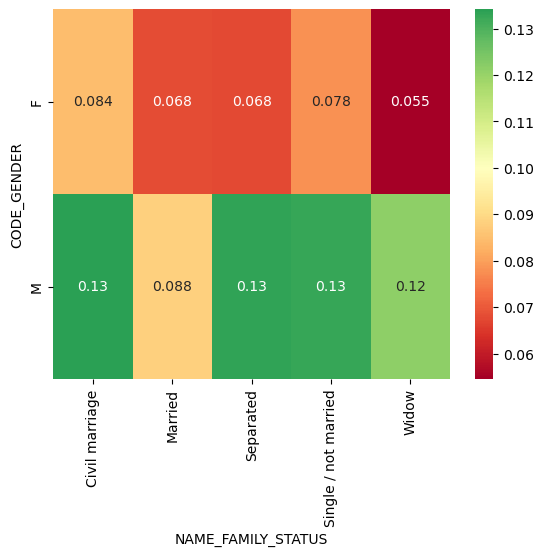

In [192]:
sns.heatmap(df3, annot= True, cmap="RdYlGn", center= 0.1)
plt.show()

### Previous application dataset

In [193]:
# load the previuos_application data
prev = pd.read_csv('previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [195]:
prev.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [196]:
app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

In [197]:
prev.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [198]:
prev.isna().sum()/prev.shape[0] * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Extract the required variables for analysis and create a new dataset

In [199]:
prev_data = prev[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']]
prev_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
0,271877,Consumer loans,Approved
1,108129,Cash loans,Approved
2,122040,Cash loans,Approved
3,176158,Cash loans,Approved
4,202054,Cash loans,Refused


In [200]:
prev_data.shape

(1670214, 3)

Merge previous data with application data

In [201]:
prev_app_data = app_data.merge(prev_data , how = 'inner', on = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE'])
prev_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_BIRTH,NAME_CONTRACT_STATUS
0,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,State servant,Higher education,Married,-1188,Core staff,2.0,47,Approved
1,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Approved
2,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Approved
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Canceled
4,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Canceled


In [202]:
prev_app_data[prev_app_data.SK_ID_CURR == 100006]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_BIRTH,NAME_CONTRACT_STATUS
1,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Approved
2,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Approved
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Canceled
4,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Canceled
5,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Refused


In [203]:
prev_app_data.shape

(596876, 17)

In [204]:
# one application can have multiple rejections or approved
prev_app_data.drop_duplicates(inplace=True)

In [205]:
prev_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_BIRTH,NAME_CONTRACT_STATUS
0,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,State servant,Higher education,Married,-1188,Core staff,2.0,47,Approved
1,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Approved
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Canceled
5,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,-3039,Laborers,2.0,53,Refused
6,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,-3038,Core staff,1.0,55,Approved


NAME_INCOME_TYPE vs NAME_CONTRACT_STATUS vs TARGET

In [206]:
df4=pd.pivot_table(data=prev_app_data, index="NAME_INCOME_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
df4

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_INCOME_TYPE,,,,
Commercial associate,0.076857,0.080730,0.108388,0.055556
Maternity leave,1.000000,1.000000,1.000000,NaN
Pensioner,0.055147,0.056467,0.075890,0.095238
State servant,0.059953,0.066021,0.091419,0.125000
Student,0.000000,0.000000,NaN,NaN
Unemployed,0.500000,0.400000,0.571429,NaN
Working,0.097397,0.103841,0.139441,0.096939


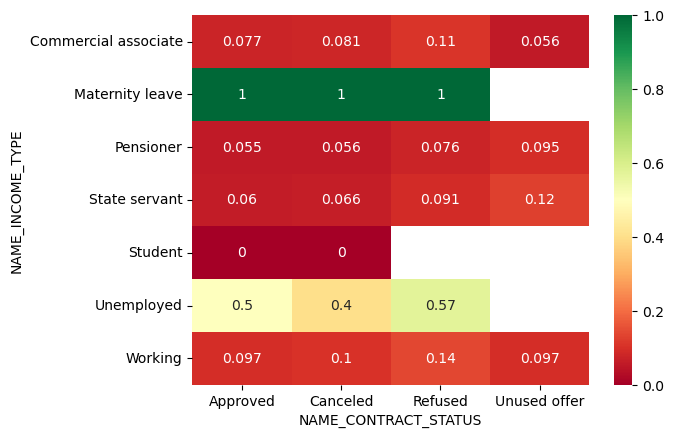

In [207]:
sns.heatmap(df4, annot= True, cmap="RdYlGn", center= 0.5)
plt.show()
# Clients who were on Maternity leave and their applications are approved tend to be more defautlers.
# Clients who were Pernsioners and their applications are refused tend to be more ontime.

NAME_EDUCATION_TYPE vs NAME_CONTRACT_STATUS vs TARGET

In [208]:
df5=pd.pivot_table(data=prev_app_data, index="NAME_EDUCATION_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
df5

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,0.015385,0.000000,0.000000,0.000000
Higher education,0.056699,0.059385,0.079790,0.052632
Incomplete higher,0.089078,0.099575,0.116396,0.000000
Lower secondary,0.093426,0.093831,0.125995,0.000000
Secondary / secondary special,0.086933,0.093191,0.126896,0.106383


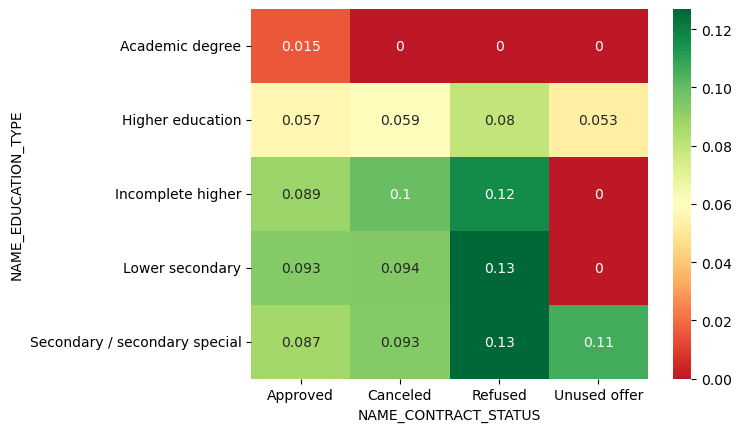

In [209]:
sns.heatmap(df5, annot= True, cmap="RdYlGn", center= 0.06)
plt.show()
# Clients who were on Maternity leave and their applications are approved tend to be more defautlers.
# Clients who were Pernsioners and their applications are refused tend to be more ontime.

CODE_GENDER vs NAME_CONTRACT_STATUS vs TARGET

In [210]:
df5=pd.pivot_table(data=prev_app_data, index="CODE_GENDER", columns="NAME_CONTRACT_STATUS", values="TARGET")
df5

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CODE_GENDER,,,,
F,0.070982,0.075408,0.103113,0.081731
M,0.102721,0.108268,0.144460,0.095588


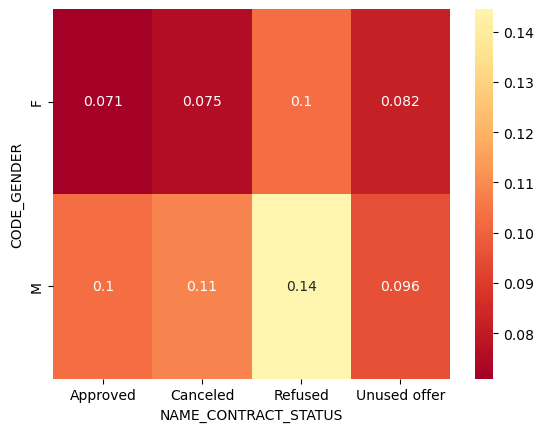

In [211]:
sns.heatmap(df5, annot= True, cmap="RdYlGn", center= 0.15)
plt.show()

OCCUPATION_TYPE vs NAME_CONTRACT_STATUS vs TARGET

In [212]:
df6=pd.pivot_table(data=prev_app_data, index="OCCUPATION_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
df6

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
OCCUPATION_TYPE,,,,
Accountants,0.055318,0.052980,0.076250,0.083333
Cleaning staff,0.085814,0.098855,0.127205,0.166667
Cooking staff,0.094081,0.111460,0.129310,0.100000
Core staff,0.063015,0.070684,0.095176,0.035714
Drivers,0.118135,0.115916,0.162858,0.035714
HR staff,0.080000,0.084416,0.120879,0.000000
High skill tech staff,0.067427,0.072716,0.101601,0.052632
IT staff,0.057971,0.063063,0.071429,NaN
Laborers,0.109003,0.115406,0.151601,0.074627


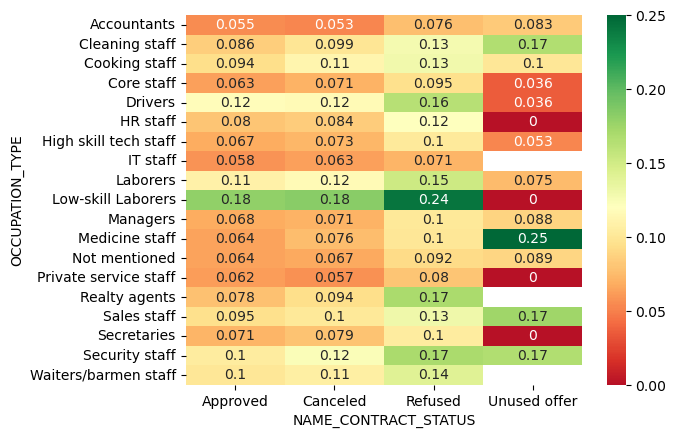

In [213]:
sns.heatmap(df6, annot= True, cmap="RdYlGn", center= 0.12)
plt.show()

Creating buckets for age group

In [214]:
prev_app_data["AGE_GROUP"]=pd.cut(prev_app_data.YEARS_BIRTH,[0, 30, 40, 50, 60, 100], labels= ["<30","30-40","40-50","50-60", "60+"])
prev_app_data.AGE_GROUP.value_counts(normalize= True)

40-50    0.251573
50-60    0.241666
30-40    0.239604
60+      0.161114
<30      0.106043
Name: AGE_GROUP, dtype: float64

AGE_GROUP vs NAME_CONTRACT_STATUS vs TARGET

In [215]:
df7=pd.pivot_table(data=prev_app_data, index="AGE_GROUP", columns="NAME_CONTRACT_STATUS", values="TARGET")
df7

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
AGE_GROUP,,,,
<30,0.112899,0.122422,0.156330,0.039216
30-40,0.099011,0.105045,0.140071,0.123810
40-50,0.082945,0.086041,0.120446,0.051948
50-60,0.068347,0.071643,0.096061,0.088608
60+,0.052316,0.051671,0.069553,0.125000


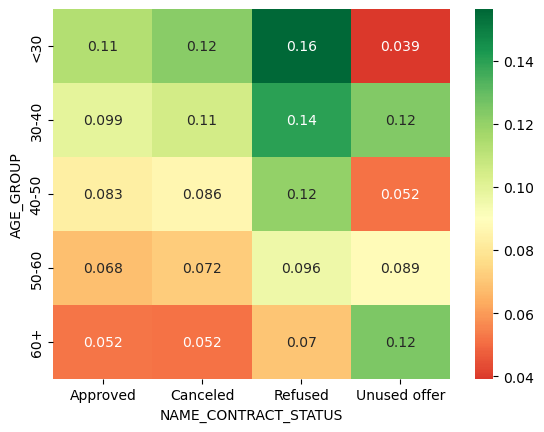

In [216]:
sns.heatmap(df7, annot= True, cmap="RdYlGn", center= 0.09)
plt.show()